# 📊 Customer Churn Prediction — Full Analysis

In [2]:
# Step 1: Load Data
import pandas as pd
df = pd.read_csv('../data/telco_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df = pd.read_csv('../data/telco_churn.csv', sep=',', engine='python', skipinitialspace=True)

# Now check:
print(df.shape)
print(df.columns.tolist())


(7043, 21)
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [9]:
# Step 2: Data Cleaning
# Step 1: Load CSV (correc
df = pd.read_csv('../data/telco_churn.csv', sep=',', engine='python', skipinitialspace=True)


# Step 2: Data Cleaning
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Save cleaned CSV
df.to_csv('../data/telco_churn_clean.csv', index=False)

# Show preview
df[['customerID', 'gender', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].head()


,customerID,gender,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,29.85,29.85,0
1,5575-GNVDE,1,0,34,56.95,1889.50,0
2,3668-QPYBK,1,0,2,53.85,108.15,1
3,7795-CFOCW,1,0,45,42.30,1840.75,0
4,9237-HQITU,0,0,2,70.70,151.65,1


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            0 non-null      float64
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
print(df.columns.tolist())


['customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn']


In [7]:
!head -n 5 ../data/telco_churn.csv


customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No


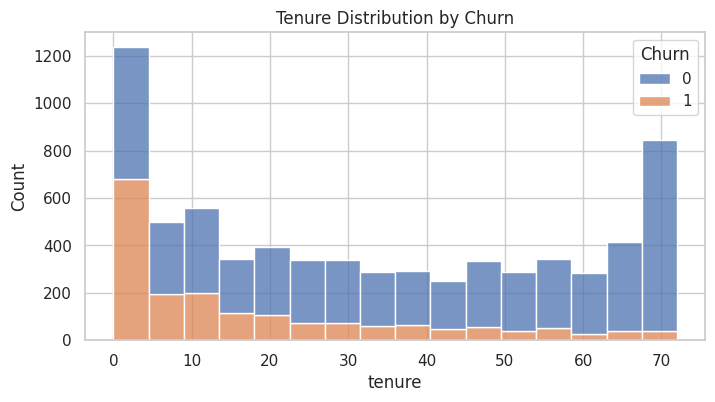

In [10]:
# Step 3: Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Tenure Distribution
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack')
plt.title('Tenure Distribution by Churn')
plt.show()

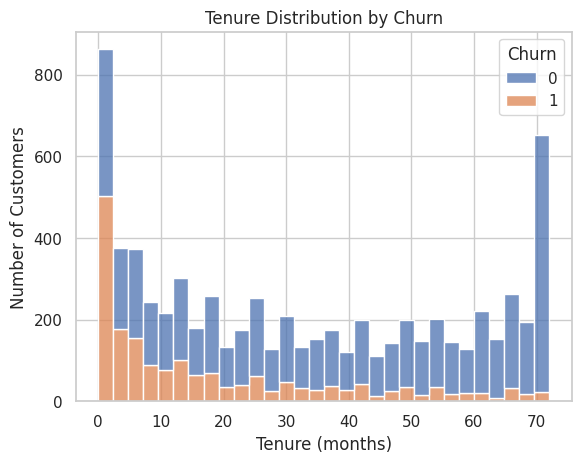

In [11]:
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)

plt.title('Tenure Distribution by Churn')
plt.xlabel('Tenure (months)')
plt.ylabel('Number of Customers')
plt.show()


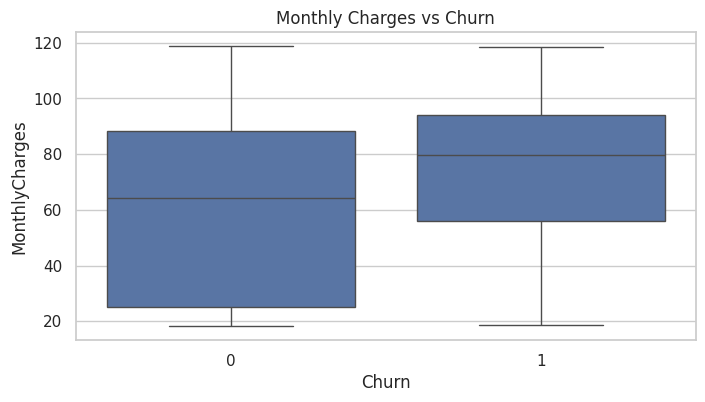

In [12]:
# Monthly Charges by Churn
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges vs Churn')
plt.show()

In [13]:
# Step 4: Statistical Test
from scipy.stats import ttest_ind
churned = df[df['Churn'] == 1]['tenure']
retained = df[df['Churn'] == 0]['tenure']
_, p_value = ttest_ind(churned, retained)
print(f"✅ T-test p-value for tenure (churned vs retained): {p_value:.4f}")

✅ T-test p-value for tenure (churned vs retained): 0.0000


In [14]:
# Step 5: Logistic Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

features = ['gender', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
X = df[features]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("✅ Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred))

✅ Confusion Matrix:
[[1420  119]
 [ 320  254]]

✅ Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1539
           1       0.68      0.44      0.54       574

    accuracy                           0.79      2113
   macro avg       0.75      0.68      0.70      2113
weighted avg       0.78      0.79      0.78      2113



In [15]:
# Step 6: Weekly Risk Report
df['RiskScore'] = model.predict_proba(X)[:, 1]
df[['customerID', 'RiskScore']].to_csv('../output/weekly_churn_risk.csv', index=False)
print("✅ Weekly churn risk report saved to output/weekly_churn_risk.csv")

✅ Weekly churn risk report saved to output/weekly_churn_risk.csv


In [16]:
# Step 7: Summary for Email
total_customers = len(df)
churn_rate = df['Churn'].mean() * 100
accuracy = model.score(X_test, y_test) * 100

print("\n📋 Summary for Email Report:")
print(f"✅ Total customers analyzed: {total_customers}")
print(f"✅ Overall churn rate: {churn_rate:.1f}%")
print(f"✅ Model accuracy: {accuracy:.1f}%")

if p_value < 0.001:
    print("✅ Significant factor: Tenure (p-value < 0.001 — lower tenure → higher churn risk)")
else:
    print(f"Tenure p-value = {p_value:.4f} — not significant.")


📋 Summary for Email Report:
✅ Total customers analyzed: 7043
✅ Overall churn rate: 26.5%
✅ Model accuracy: 79.2%
✅ Significant factor: Tenure (p-value < 0.001 — lower tenure → higher churn risk)
